In [19]:
# Importing necessary libraries for data manipulation and visualization
import pandas as pd  # For data manipulation and analysis
import seaborn as sns  # For data visualization
import matplotlib.pyplot as plt  # For plotting
from sklearn.linear_model import LinearRegression  # For linear regression modeling
import numpy as np  # For numerical operations
from sklearn.impute import SimpleImputer # For checking NaN values

# Import data from .csv file
dataset = pd.read_csv('owid-energy-data full-1.csv')

# Display a preview of the dataset to verify successful import and understand its structure
dataset

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,ASEAN (Ember),2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
1,ASEAN (Ember),2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
2,ASEAN (Ember),2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
3,ASEAN (Ember),2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
4,ASEAN (Ember),2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21585,Zimbabwe,2018,ZWE,15052191.0,2.271535e+10,NaN,NaN,NaN,NaN,25.910,...,0.218,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
21586,Zimbabwe,2019,ZWE,15354606.0,NaN,NaN,NaN,NaN,NaN,24.748,...,0.364,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
21587,Zimbabwe,2020,ZWE,15669663.0,NaN,NaN,NaN,NaN,NaN,22.336,...,0.395,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
21588,Zimbabwe,2021,ZWE,15993525.0,NaN,NaN,NaN,NaN,NaN,23.760,...,0.498,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN


In [20]:
# Display the summary statistics of the dataset for initial insights
dataset.describe()

,year,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,biofuel_electricity,biofuel_share_elec,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
count,21590.000000,1.822400e+04,1.113800e+04,1747.000000,2687.000000,2302.000000,2767.000000,5278.000000,5529.000000,5494.000000,...,6849.000000,4035.000000,2413.000000,4639.000000,4744.000000,7070.000000,8000.000000,4065.000000,6885.000000,4101.000000
mean,1973.675498,1.049096e+08,3.578413e+11,46.091694,2.719074,133.558459,38.068209,63.043115,10.904961,1.852920,...,0.626012,0.210395,267.541206,7.314174,53.422938,62.769786,17.529972,232.108949,1.401382,0.651413
std,35.155113,4.628010e+08,2.408514e+12,274.616745,10.057018,264.707851,111.623148,196.689187,47.612938,5.104237,...,2.077071,0.643304,5940.944120,37.327922,273.255306,252.659338,101.380285,733.841324,4.482261,1.893820
min,1900.000000,1.833000e+03,1.642060e+08,-100.000000,-50.843000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-100.000000,-51.208000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1945.000000,1.726186e+06,1.368156e+10,-0.616500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,4.029000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1983.000000,6.990115e+06,4.174163e+10,8.179000,0.000000,15.482000,0.673000,0.135000,0.010000,0.065500,...,0.000000,0.000000,20.000000,0.000000,0.005000,0.000000,0.000000,0.051000,0.000000,0.003000
75%,2003.000000,2.558270e+07,1.741312e+11,26.508500,0.861500,165.266750,13.629500,34.992500,0.680000,1.567750,...,0.096000,0.018500,47.971000,0.315000,2.357750,2.099500,0.139000,45.523000,0.372000,0.268000
max,2022.000000,7.975105e+09,1.136302e+14,5659.328000,141.131000,2588.512000,1199.207000,2514.102000,675.110000,71.429000,...,40.000000,7.586000,242384.844000,665.413000,5487.600000,3218.151000,2098.460000,8422.012000,56.840000,26.157000


In [21]:
# List of ASEAN member states for filtering the dataset
asean_member_states = [
    "Brunei", 
    "Cambodia", 
    "Indonesia", 
    "Laos", 
    "Malaysia", 
    "Myanmar", 
    "Philippines", 
    "Singapore", 
    "Thailand", 
    "Vietnam"]

# List of years to be included in the filtered dataset
included_years = [2017, 2018, 2019, 2020, 2021, 2022]

# List of column names to be retained in the filtered dataset
column_names = [
    'country',
    'year',
    'population',
    'gdp',
    'biofuel_consumption',
    'coal_consumption',
    'fossil_fuel_consumption',
    'gas_consumption',
    'hydro_consumption',
    'oil_consumption',
    'wind_consumption',
    'other_renewable_consumption',
    'solar_consumption'
]

# Filtering the dataset for the specified years and countries
filtered_year_dataset = dataset[(dataset['year'].isin(included_years)) & (dataset['country'].isin(asean_member_states))]

# Selecting only the specified columns
filtered_year_dataset = filtered_year_dataset[column_names]

# Displaying the filtered dataset
filtered_year_dataset

,country,year,population,gdp,biofuel_consumption,coal_consumption,fossil_fuel_consumption,gas_consumption,hydro_consumption,oil_consumption,wind_consumption,other_renewable_consumption,solar_consumption
3186,Brunei,2017,430290.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3187,Brunei,2018,434283.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3188,Brunei,2019,438058.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3189,Brunei,2020,441736.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3190,Brunei,2021,445382.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3191,Brunei,2022,449002.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3575,Cambodia,2017,15830694.0,5.537077e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3576,Cambodia,2018,16025242.0,5.954185e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3577,Cambodia,2019,16207746.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3578,Cambodia,2020,16396864.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


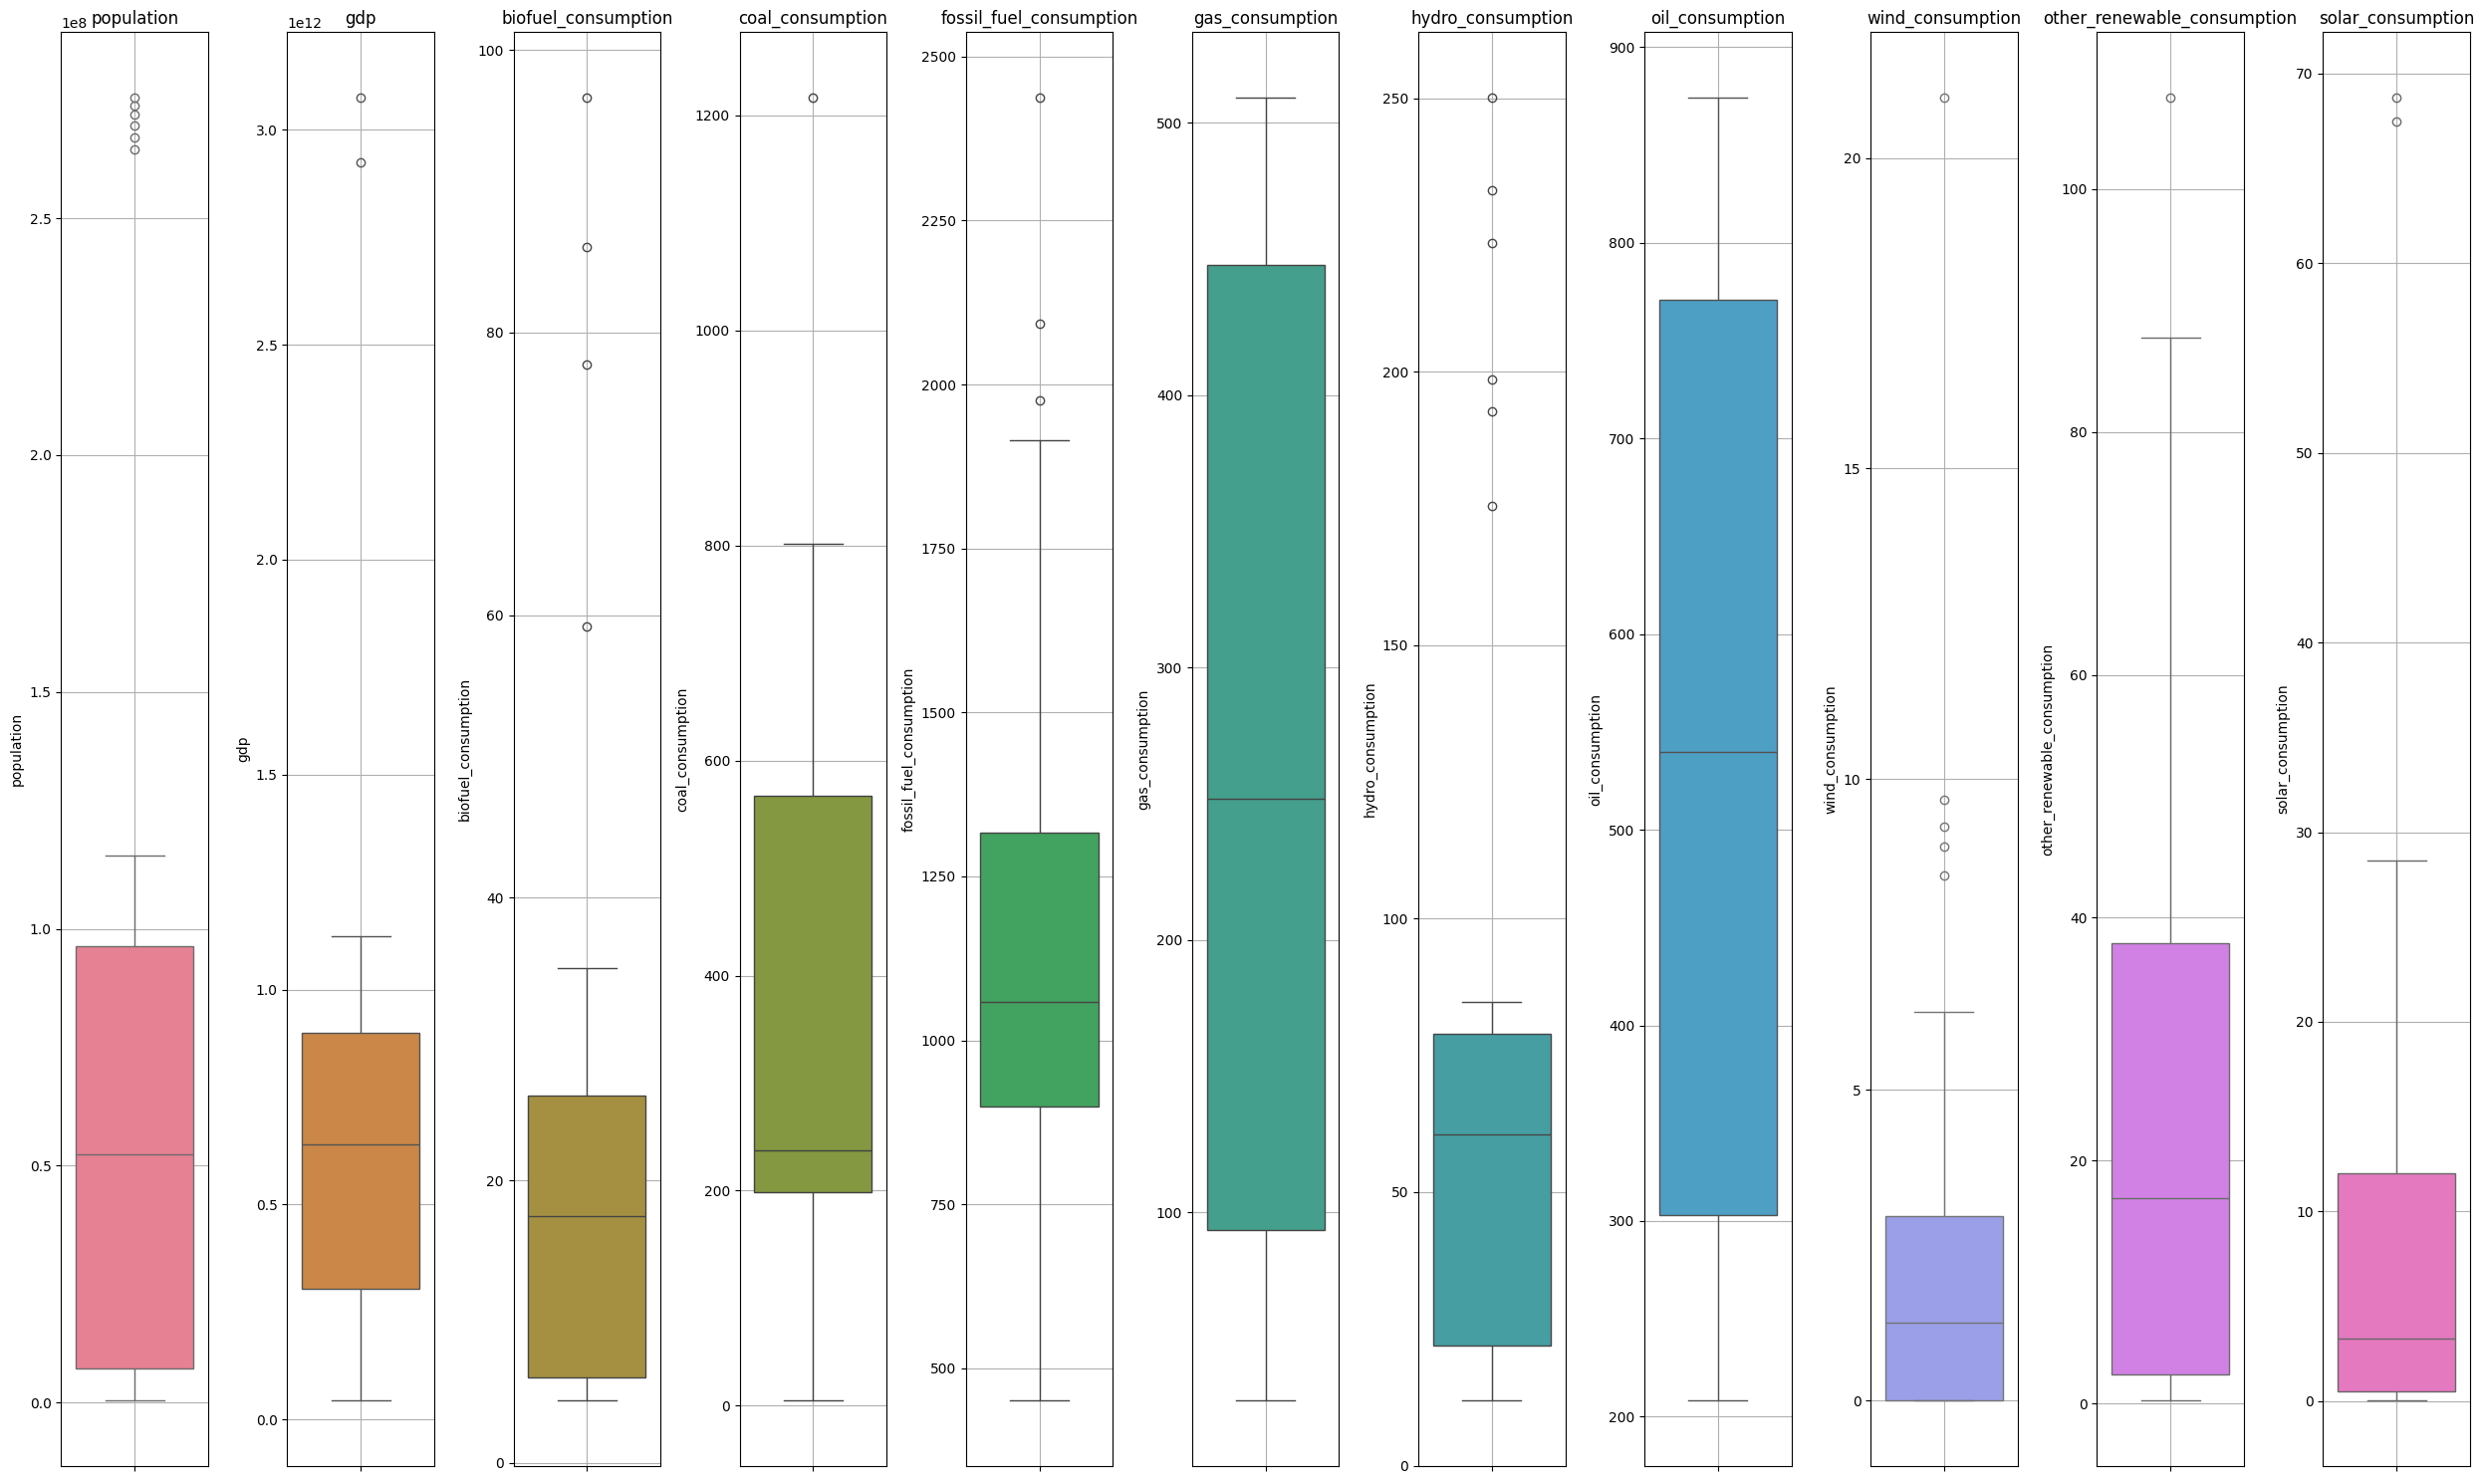

In [22]:
# Drop 'country' and 'year' columns from the filtered dataset
filtered_dataset = filtered_year_dataset.drop(columns=['country', 'year'])

# Set the overall figure size for the subplots
plt.figure(figsize=(25, 15))

# Get the list of column names
feature_columns = filtered_dataset.columns

# Generate a list of colors for the boxplots
colors = sns.color_palette('husl', len(feature_columns))  # Using 'husl' palette for better color differentiation

# Create a subplot for each feature in the dataset
for i, feature in enumerate(feature_columns, 1):
    # Create subplots in a single row
    plt.subplot(1, len(feature_columns), i)  
    # Create a boxplot for the current feature with the specified color
    sns.boxplot(y=filtered_dataset[feature], color=colors[i-1])
    # Set the title of the subplot to the feature name
    plt.title(feature)
    # Add grid lines to the subplot
    plt.grid(True)
    # Adjust the layout to prevent overlap
    plt.tight_layout()

# Display all the subplots
plt.show()

                             population       gdp  biofuel_consumption  \
population                     1.000000  0.943725             0.783866   
gdp                            0.943725  1.000000             0.820056   
biofuel_consumption            0.783866  0.820056             1.000000   
coal_consumption               0.838738  0.824992             0.906047   
fossil_fuel_consumption        0.645312  0.812890             0.824490   
gas_consumption                0.162604  0.496849             0.278676   
hydro_consumption             -0.068691 -0.302745             0.281031   
oil_consumption                0.234503  0.503959             0.752164   
wind_consumption              -0.003932 -0.112719            -0.083184   
other_renewable_consumption    0.831980  0.814549             0.889291   
solar_consumption             -0.072633 -0.074581            -0.269465   

                             coal_consumption  fossil_fuel_consumption  \
population                           

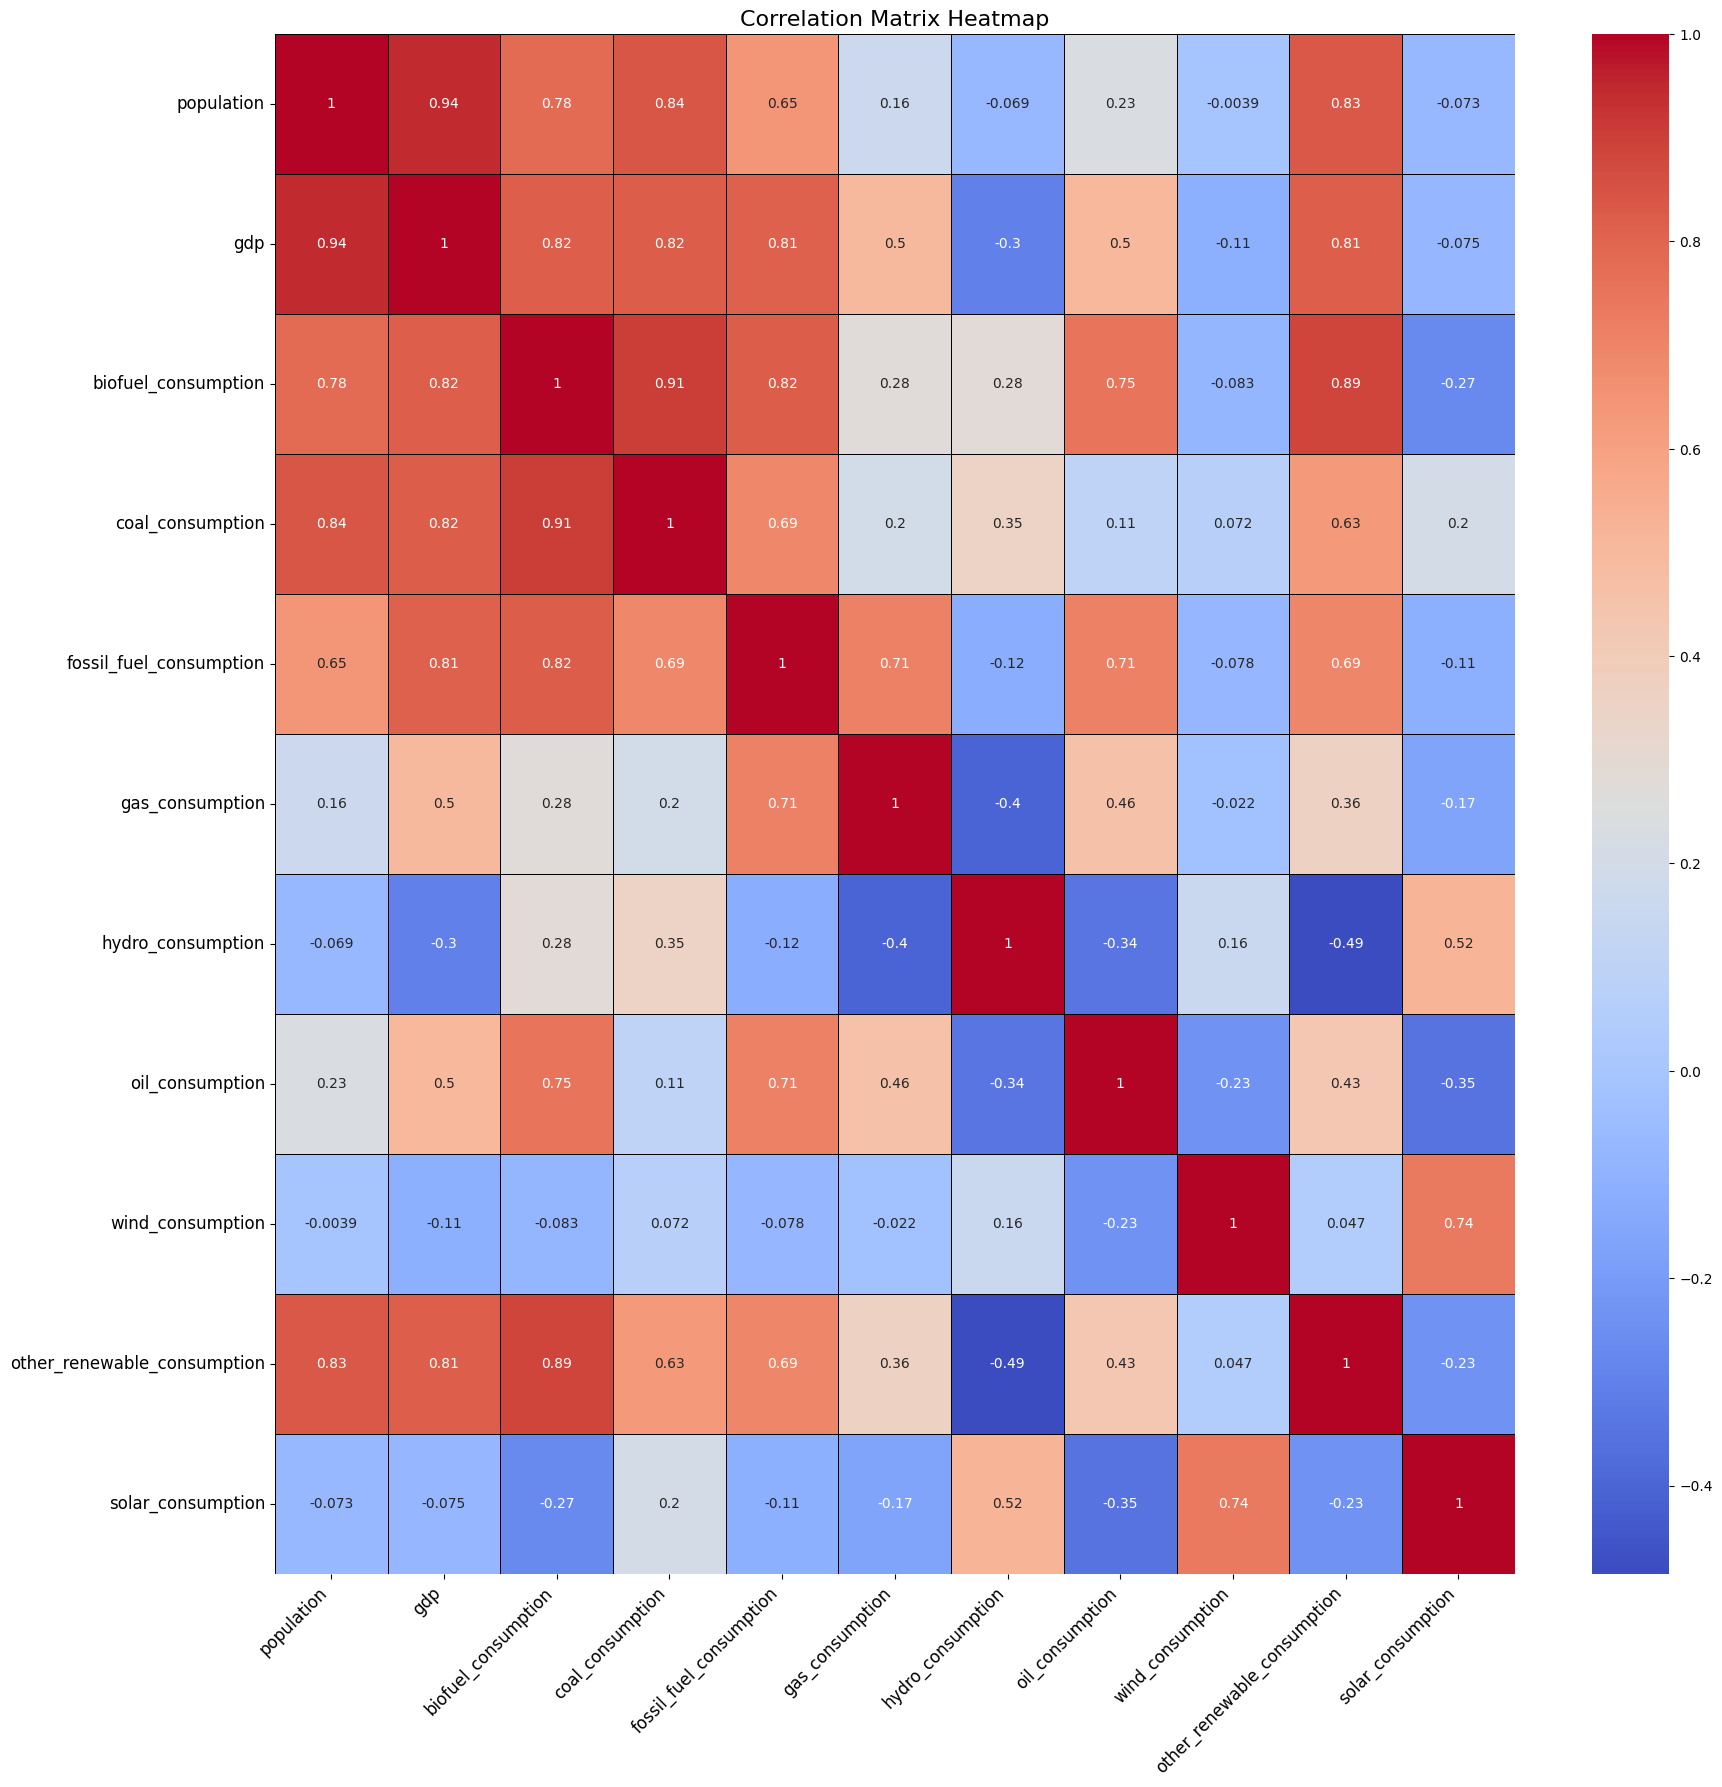

In [23]:
# Calculate the correlation matrix for the filtered dataset
correlation_matrix = filtered_dataset.corr()

# Printing the numerical version of correlation matrix
print(correlation_matrix)

# Set the overall figure size for the heatmap
plt.figure(figsize=(20,20))

# Create a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black', annot_kws={"size": 10})

# Rotate the labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)

# Set the title for the heatmap
plt.title('Correlation Matrix Heatmap', fontsize=16)

# Display the heatmap
plt.show()

                             population       gdp  biofuel_consumption  \
population                     1.000000  0.943725             0.783866   
gdp                            0.943725  1.000000             0.820056   
biofuel_consumption            0.783866  0.820056             1.000000   
coal_consumption               0.838738  0.824992             0.906047   
fossil_fuel_consumption        0.645312  0.812890             0.824490   
gas_consumption                0.000000  0.000000             0.000000   
hydro_consumption              0.000000  0.000000             0.000000   
oil_consumption                0.000000  0.503959             0.752164   
wind_consumption               0.000000  0.000000             0.000000   
other_renewable_consumption    0.831980  0.814549             0.889291   
solar_consumption              0.000000  0.000000             0.000000   

                             coal_consumption  fossil_fuel_consumption  \
population                           

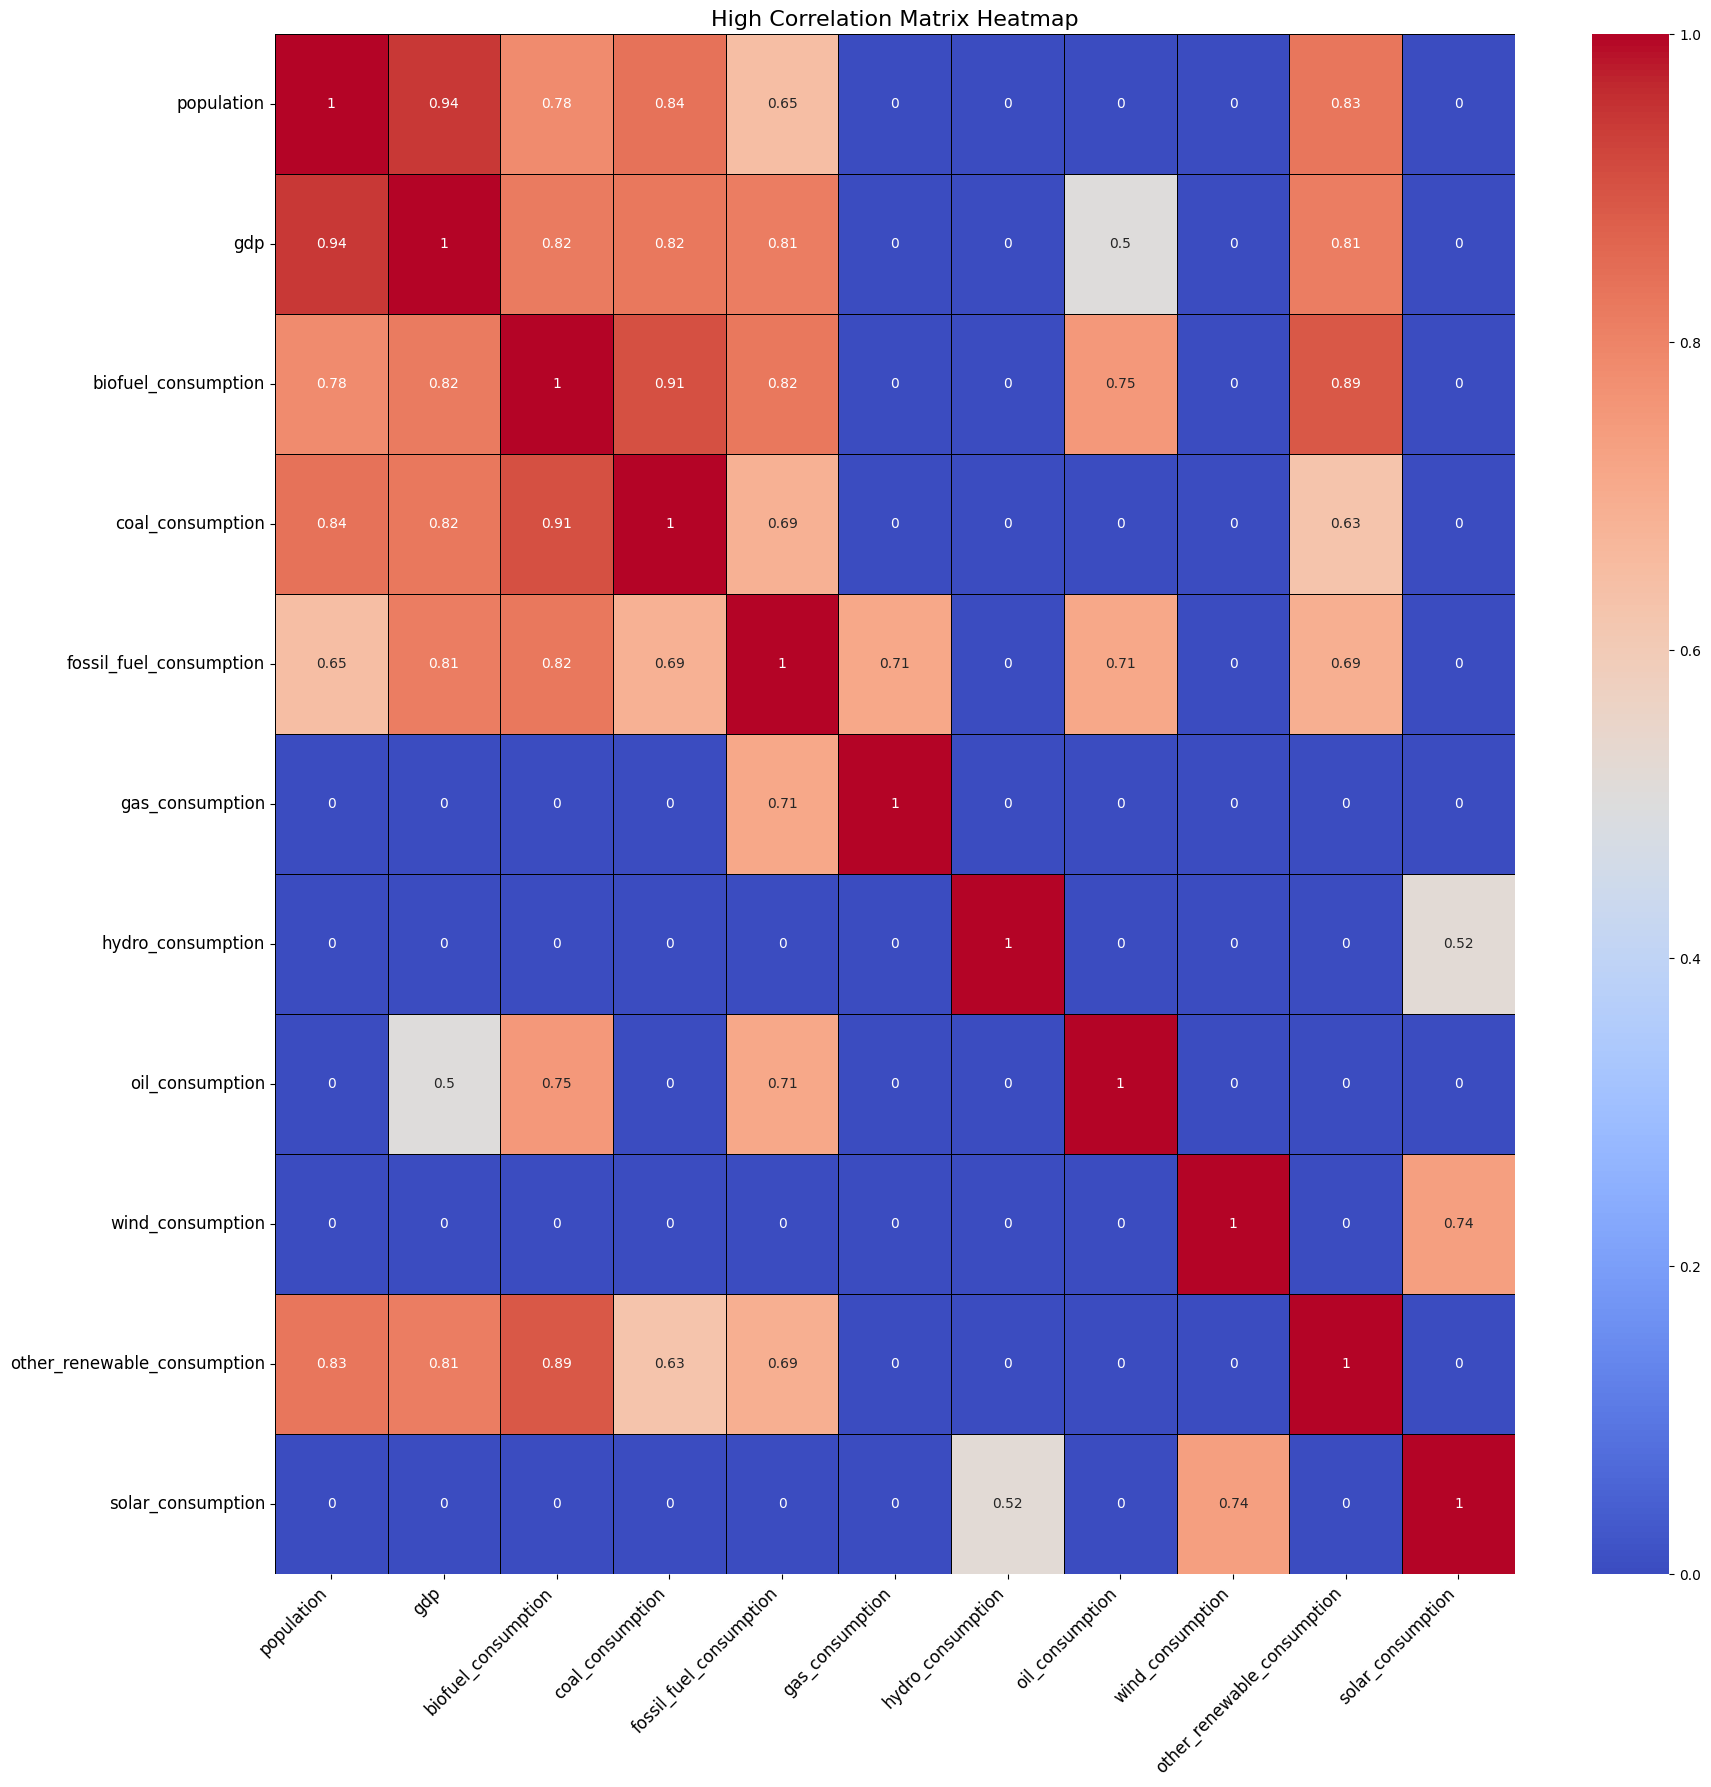

In [24]:
# Filter the correlation matrix for values greater than 0.5
high_correlation = correlation_matrix[(correlation_matrix > 0.5)]

# Replace NaN values with 0
high_correlation = high_correlation.fillna(0)

# Print the filtered correlation matrix
print(high_correlation)

# Set the overall figure size for the heatmap
plt.figure(figsize=(20,20))

# Create a heatmap to visualize the filtered correlation matrix
sns.heatmap(high_correlation, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black', annot_kws={"size": 10})

# Rotate the labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)

# Set the title for the heatmap
plt.title('High Correlation Matrix Heatmap', fontsize=16)

# Display the heatmap
plt.show()

In [25]:
# Select correlations involving 'gdp'
gdp_correlations = correlation_matrix[['gdp']]

# Filter the correlations to keep only values greater than 0.5
gdp_positive_correlations_above_25 = gdp_correlations[(gdp_correlations['gdp'] > 0.25)]

# Extract the header values into a variable
correlated_headers = gdp_positive_correlations_above_25.index.tolist()

# Subset the filtered_year_dataset to keep only the columns with high correlations with 'gdp'
gdp_correlated_dataset  = filtered_year_dataset[correlated_headers]

# Display the resulting dataset
gdp_correlated_dataset 

,population,gdp,biofuel_consumption,coal_consumption,fossil_fuel_consumption,gas_consumption,oil_consumption,other_renewable_consumption
3186,430290.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3187,434283.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3188,438058.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3189,441736.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3190,445382.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3191,449002.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3575,15830694.0,5.537077e+10,NaN,NaN,NaN,NaN,NaN,NaN
3576,16025242.0,5.954185e+10,NaN,NaN,NaN,NaN,NaN,NaN
3577,16207746.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3578,16396864.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


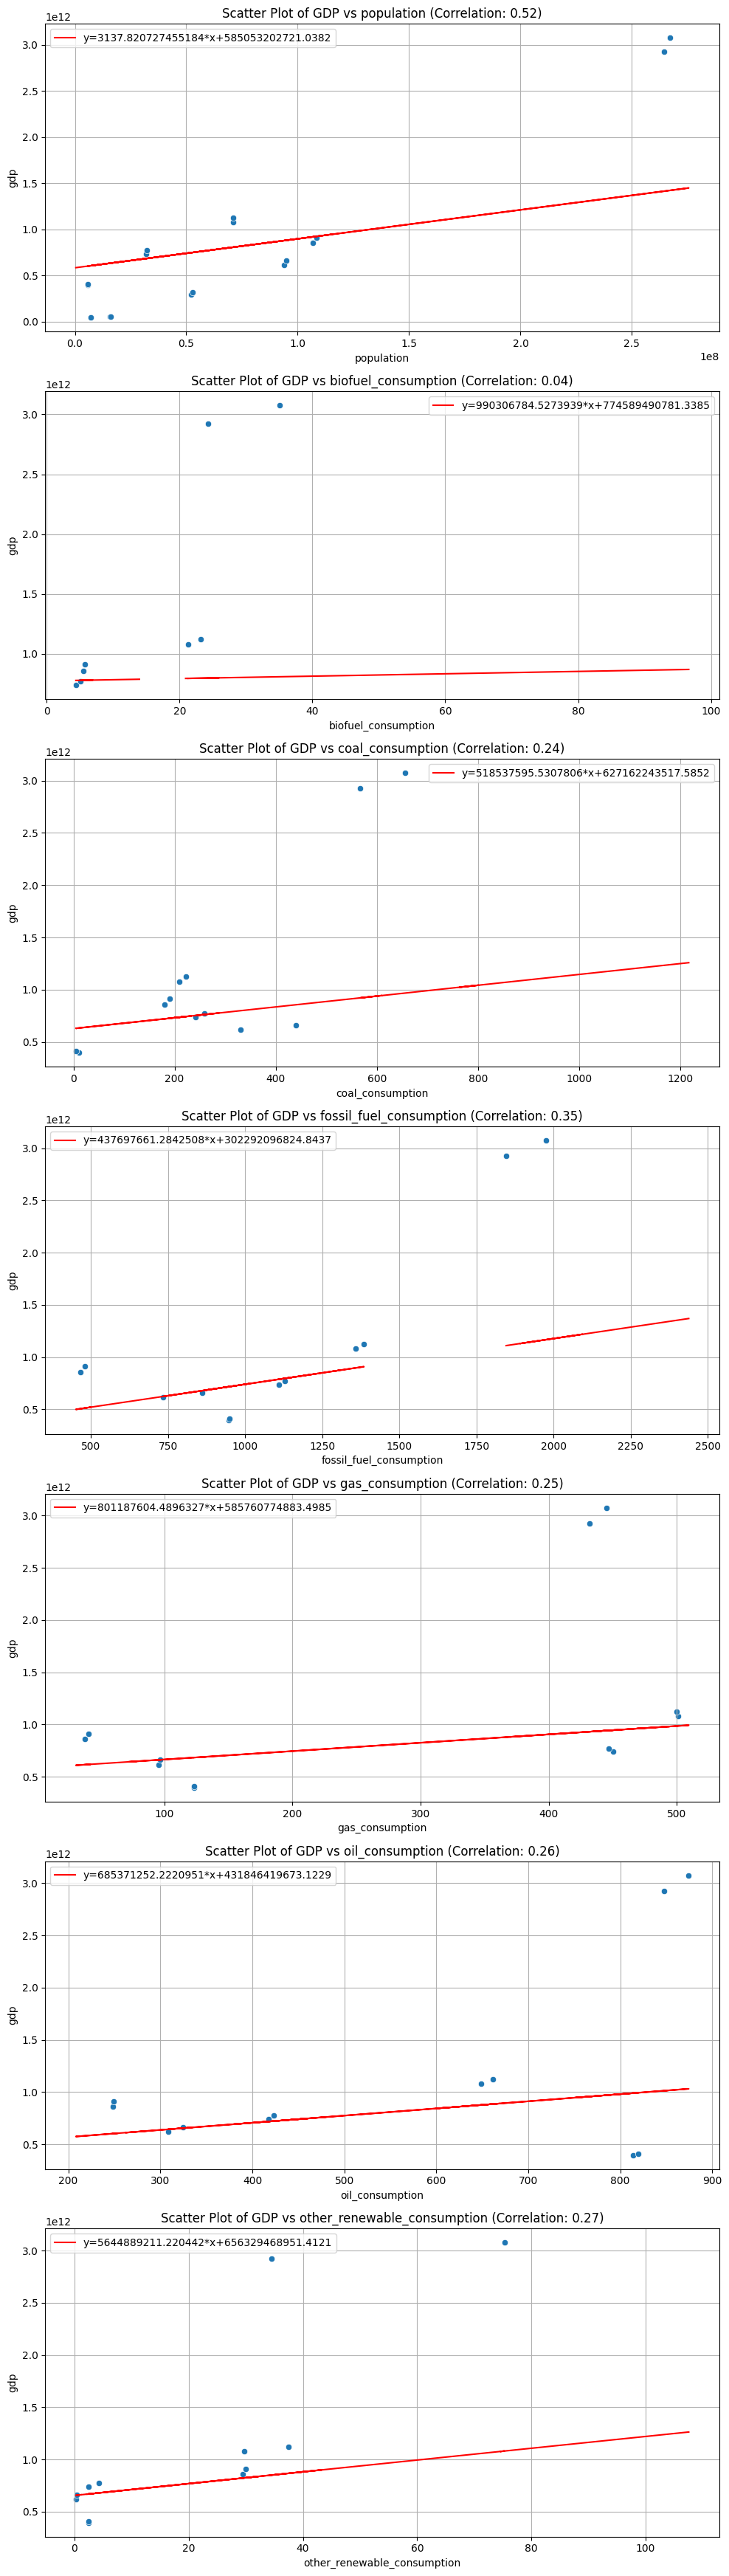

In [26]:
# Calculate the number of features (excluding 'gdp') for the subplot grid
num_features = len(correlated_headers) - 1

# Create a figure with subplots
plt.figure(figsize=(10, 5 * num_features)) # Adjust figure size based on the number of features
subplot_index = 1  # Initialize subplot index counter

# Initialize the SimpleImputer with the mean strategy
imputer = SimpleImputer(strategy='mean')

# Loop through each feature to create scatter plots against GDP
for feature in correlated_headers:
    if feature == 'gdp':
        continue # Skip 'gdp' as we don't need to plot it against itself
    
    plt.subplot(num_features, 1, subplot_index) # Create subplot for current feature
    sns.scatterplot(x=filtered_dataset[feature], y=filtered_dataset['gdp']) # Scatter plot of GDP vs feature

    # Calculate the linear regression
    X = gdp_correlated_dataset [feature].values.reshape(-1, 1) # Independent variable
    y = gdp_correlated_dataset ['gdp'].values.reshape(-1, 1) # Dependent variable

    # Apply the imputer to handle any missing values
    X_imputed = imputer.fit_transform(X)
    y_imputed = imputer.fit_transform(y)

    # Fit the linear regression model
    model = LinearRegression()
    model.fit(X_imputed, y_imputed)
    
    # Extract the slope (coefficient) and intercept
    slope = model.coef_[0][0]  
    intercept = model.intercept_[0]  

    # Add the regression line to the plot
    plt.plot(filtered_dataset[feature], model.predict(X_imputed), 'r', label=f'y={slope}*x+{intercept}')

    # Calculate the correlation coefficient
    correlation_coefficient = np.corrcoef(X_imputed.flatten(), y_imputed.flatten())[0, 1]

    # Add the correlation coefficient to the plot title
    plt.title(f'Scatter Plot of GDP vs {feature} (Correlation: {correlation_coefficient:.2f})')
    
    subplot_index += 1  # Increment subplot index counter only for valid plots

    plt.legend()  # Add legend to the plot
    plt.grid(True)  # Add grid to the plot


# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()  

In [27]:
def get_user_input(dataframe):
    # Flag to control the while loop for invalid input
    invalid_input = True

    # Get the list of column headers from the DataFrame
    dataframe = dataframe.columns

    # Get the number of columns
    header_count = len(dataframe)

    # Loop until the user provides valid input
    while invalid_input:
        try:
            # Prompt the user to enter a number corresponding to a header
            regression_feature_input = input(f"Enter a number (1-{header_count}): ")

            # Attempt to convert the user input to an integer
            regression_feature_input = int(regression_feature_input)

            # Check if the input is within the valid range
            if 1 <= regression_feature_input <= header_count:
                invalid_input = False # Set the flag to exit the loop
                # Return the corresponding header (adjusting for zero-based indexing)
                return dataframe[regression_feature_input - 1] 
            else:
                # Prompt the user to enter a valid number within the specified range
                print(f"Invalid input. Please enter a number between 1 and {header_count}.")
        except ValueError:
            # Handle the case where the input cannot be converted to an integer
            print("Invalid input. Please enter a valid number")        

In [28]:
def display_features(headers):
    print("Please pick a feature for regression analysis:")
    # Enumerate through the list of features, starting the index from 1
    for index, feature in enumerate(headers, start=1):
        # Print each feature with its corresponding index
        print(f"[{index}] {feature}")

In [29]:
print("[Independent Variable (X)]")

# Call the function to display the list of features for regression analysis
display_features(filtered_dataset)

[Independent Variable (X)]
Please pick a feature for regression analysis:
[1] population
[2] gdp
[3] biofuel_consumption
[4] coal_consumption
[5] fossil_fuel_consumption
[6] gas_consumption
[7] hydro_consumption
[8] oil_consumption
[9] wind_consumption
[10] other_renewable_consumption
[11] solar_consumption


In [30]:
# Create a list to store the selected regression feature
regression_features = [get_user_input(filtered_dataset)]

In [31]:
# Remove the selected regression feature from the dataset and store the updated dataset headers
updated_feature_headers = filtered_dataset.drop(columns=regression_features)

print("[Dependent Variable (Y)]")

# Display the available features for regression analysis
display_features(updated_feature_headers)

[Dependent Variable (Y)]
Please pick a feature for regression analysis:
[1] gdp
[2] biofuel_consumption
[3] coal_consumption
[4] fossil_fuel_consumption
[5] gas_consumption
[6] hydro_consumption
[7] oil_consumption
[8] wind_consumption
[9] other_renewable_consumption
[10] solar_consumption


In [32]:
# Append the user-selected dependent variable (Y) to the list of regression features
regression_features.append(get_user_input(pd.DataFrame(updated_feature_headers)))

In [33]:
# Create a new DataFrame containing only the selected regression features
filtered_dataset = filtered_year_dataset[regression_features]

# Display the filtered dataset
filtered_dataset

,population,gdp
3186,430290.0,NaN
3187,434283.0,NaN
3188,438058.0,NaN
3189,441736.0,NaN
3190,445382.0,NaN
3191,449002.0,NaN
3575,15830694.0,5.537077e+10
3576,16025242.0,5.954185e+10
3577,16207746.0,NaN
3578,16396864.0,NaN


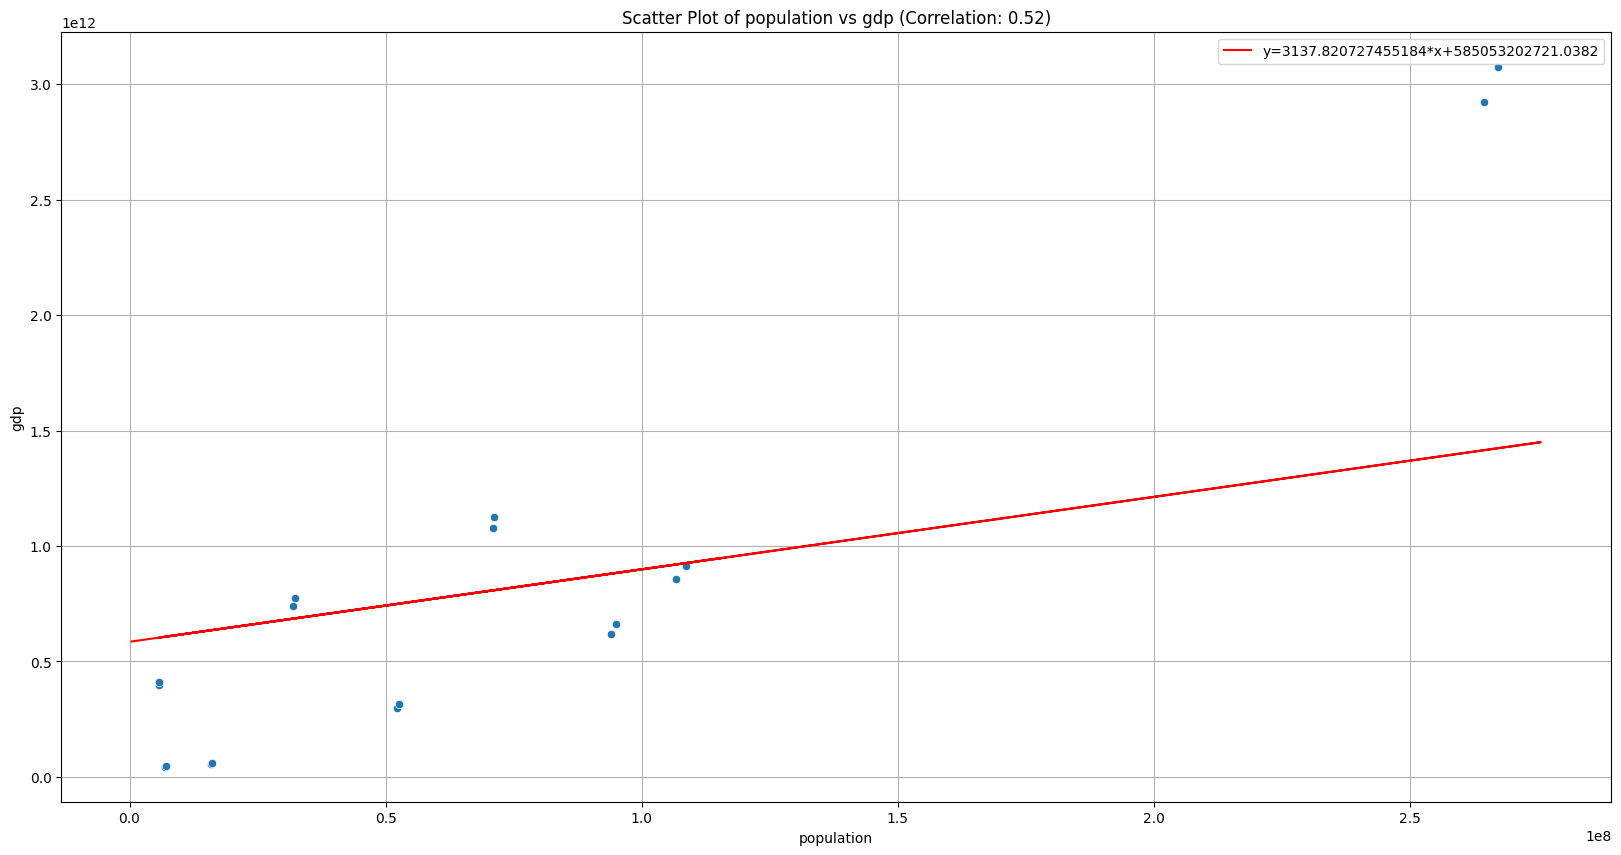

In [34]:
# Set the size of each subplot
plt.figure(figsize=(20,10))

# Create a scatter plot
sns.scatterplot(data = filtered_dataset, x=filtered_dataset.columns[0], y=filtered_dataset.columns[-1])

# Extract the independent and dependent variables
X = filtered_dataset.iloc[:, 0].values.reshape(-1, 1) # Independent variable
y = filtered_dataset.iloc[:, -1].values.reshape(-1, 1)  # Dependent variable

# Apply the imputer to handle any missing values
X_imputed = imputer.fit_transform(X)
y_imputed = imputer.fit_transform(y)

# Fit the linear regression model
model = LinearRegression()
model.fit(X_imputed, y_imputed)

# Extract the slope (coefficient) and intercept
slope = model.coef_[0][0]  
intercept = model.intercept_[0]

# Add the regression line
plt.plot(filtered_dataset[filtered_dataset.columns[0]], model.predict(X_imputed), 'r', label=f'y={slope}*x+{intercept}')

# Calculate the correlation coefficient
correlation_coefficient = np.corrcoef(X_imputed.flatten(), y_imputed.flatten())[0, 1]

# Add the correlation coefficient to the plot title
plt.title(f'Scatter Plot of {filtered_dataset.columns[0]} vs {filtered_dataset.columns[-1]} (Correlation: {correlation_coefficient:.2f})')

# Add legend and grid
plt.legend()
plt.grid(True) 

# Show the plot
plt.show()

            population       gdp
population    1.000000  0.943725
gdp           0.943725  1.000000


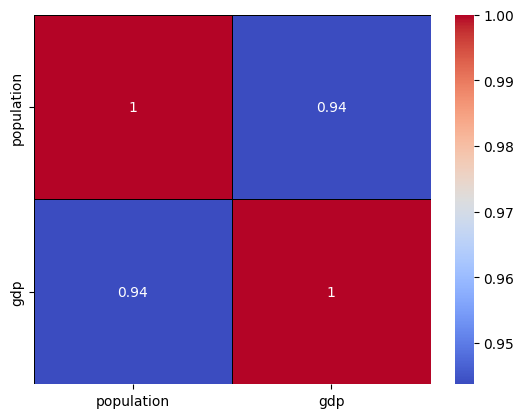

In [35]:
# Calculate the correlation matrix
correlation_matrix = filtered_dataset.corr()

# Printing the numerical version of correlation matrix
print(correlation_matrix)

# Plotting the correlation matrix as a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black', annot_kws={"size": 10})

# Display the heatmap
plt.show()

In [36]:
# Calculate the minimum and maximum values of the independent variable (X)
min_values = int(np.min(X[:, 0], axis=0))
max_values = int(np.max(X[:, 0], axis=0))

# Initialize the flag for invalid input
invalid_input = True

# Continue prompting the user until valid input is provided or the user ends the loop
while invalid_input:
    try:
        # Prompt the user to enter a value for the independent variable or 'N' to end
        regression_x_input = input(f"Enter a {filtered_dataset.columns[0]} number between {min_values} - {max_values} or 'N' to end: ")

        # Check if the user wants to end the input process
        if regression_x_input.lower() == 'n':
            break
        # Convert the user input to an integer
        regression_x_input = int(regression_x_input)

        # Check if the input value is within the specified range
        if min_values <= regression_x_input <= max_values:
            # Calculate the predicted value of the dependent variable (Y) using the linear regression equation
            print(f"The calculated {filtered_dataset.columns[-1]} is {slope * regression_x_input + intercept}")
        else:
            # Prompt the user to enter a valid number within the specified range
            print(f"Invalid input. Please enter a number between {min_values} and {max_values} or 'N' to end.")
    except ValueError:
        # Prompt the user to enter a valid number or 'N' to end
        print("Invalid input. Please enter a valid number or 'N' to end")  
        

The calculated gdp is 586403375601.8549
